There are a few different ways to check how well we sample a timescale in MAF. Let's compare `TgapsPercentMetric` and `GapsMetric`

In [1]:
import numpy as np
from rubin_sim.maf import GapsMetric, TgapsPercentMetric
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# get the dtype as expected
data = np.zeros(10, dtype=[('observationStartMJD', float)])

# Define a set of times
data['observationStartMJD'] += np.arange(10)

In [3]:
data

array([(0.,), (1.,), (2.,), (3.,), (4.,), (5.,), (6.,), (7.,), (8.,),
       (9.,)], dtype=[('observationStartMJD', '<f8')])

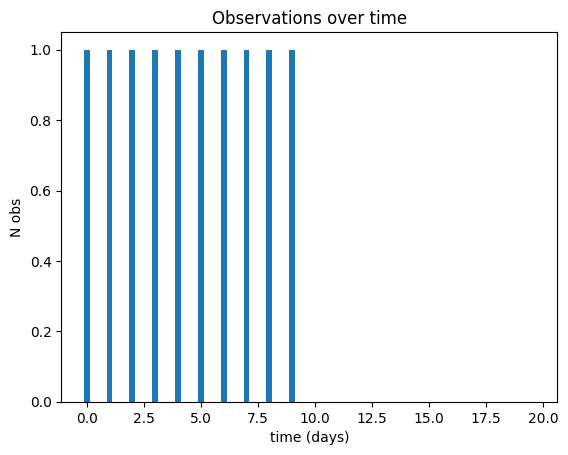

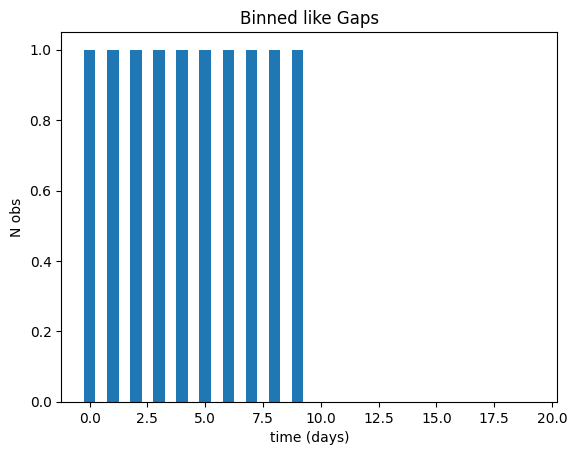

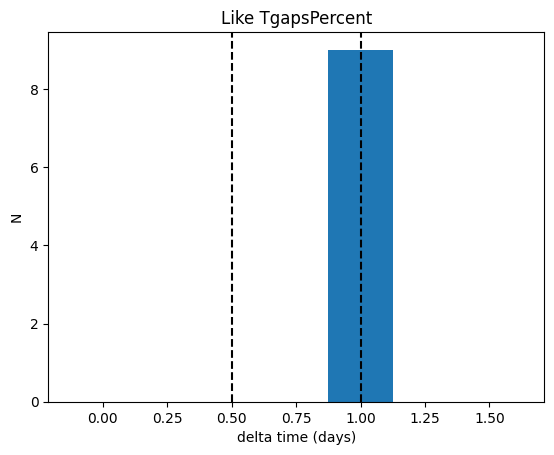

In [4]:
plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.25)-.125)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Observations over time')

plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.5)-.25)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Binned like Gaps')

plt.figure()
_tmp = plt.hist(np.diff(data['observationStartMJD']), bins=np.arange(0,2, 0.25)-.125)
plt.xlabel('delta time (days)')
plt.ylabel('N')
plt.title('Like TgapsPercent')

plt.axvline(x=0.5, linestyle='--', color='k')
plt.axvline(x=1.0, linestyle='--', color='k')

Text(0, 0.5, 'N obs')

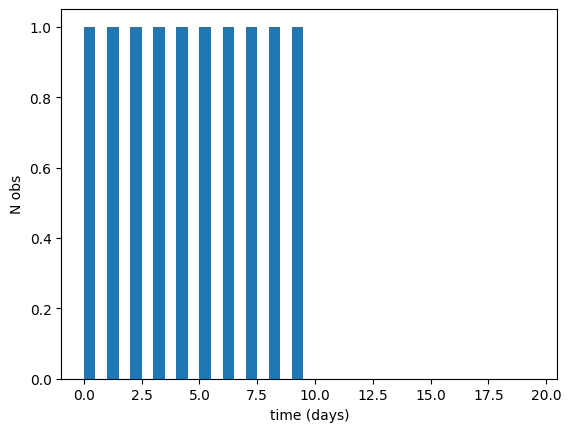

In [5]:
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.5))
plt.xlabel('time (days)')
plt.ylabel('N obs')

In [6]:
# TgapsPercent will tell us what percentage of consecutive observations are in the range 0.5 to 1 day
tgp = TgapsPercentMetric(min_time=0.5, max_time=1.)

# Gaps will tell us how many times we have independently sampled the 0.5-1.5 day timescale. 
gaps = GapsMetric(time_scale=24.0)

In [7]:
tgp.run(data)

100.0

In [8]:
gaps.run(data)

8

In [9]:
# what this is telling us--we are 100% optimized for observing at the 1-day timescale. 
# And we have observed the timescale of interest 8 times

In [10]:
# what happens if we double the number of observations by increasing the frequency
data = np.zeros(20, dtype=[('observationStartMJD', float)])

# Define a set of times
data['observationStartMJD'] += np.arange(0, 10, 0.5)


In [11]:
data

array([(0. ,), (0.5,), (1. ,), (1.5,), (2. ,), (2.5,), (3. ,), (3.5,),
       (4. ,), (4.5,), (5. ,), (5.5,), (6. ,), (6.5,), (7. ,), (7.5,),
       (8. ,), (8.5,), (9. ,), (9.5,)],
      dtype=[('observationStartMJD', '<f8')])

In [12]:
tgp.run(data)

100.0

In [13]:
gaps.run(data)

17

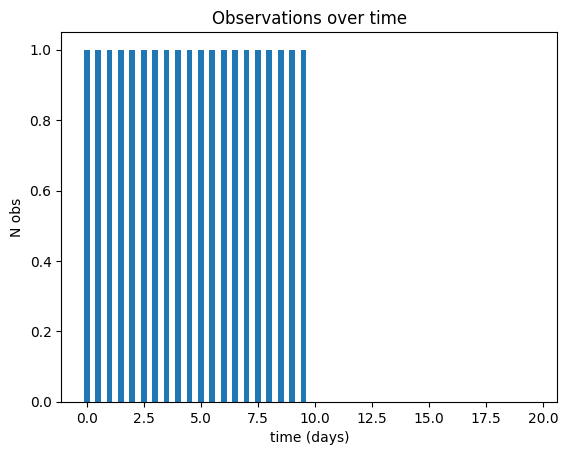

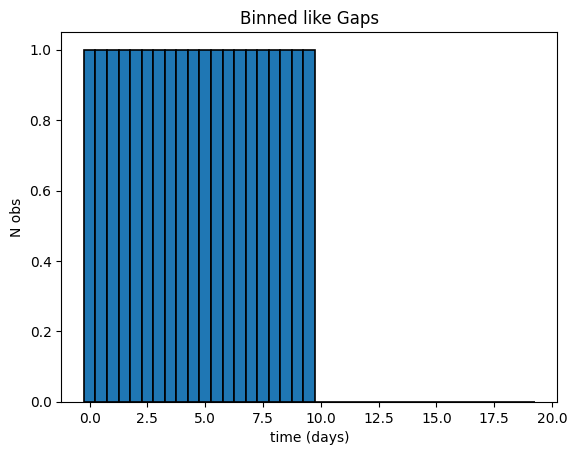

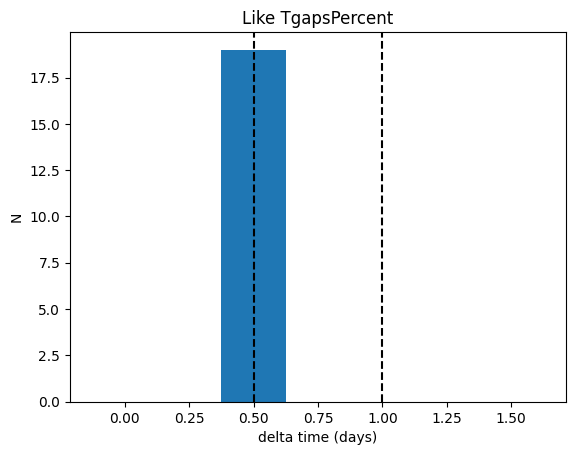

In [14]:
plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.25)-.125)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Observations over time')

plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.5)-.25, edgecolor='black', linewidth=1.2)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Binned like Gaps')

plt.figure()
_tmp = plt.hist(np.diff(data['observationStartMJD']), bins=np.arange(0,2, 0.25)-.125)
plt.xlabel('delta time (days)')
plt.ylabel('N')
plt.title('Like TgapsPercent')

plt.axvline(x=0.5, linestyle='--', color='k')
plt.axvline(x=1.0, linestyle='--', color='k')

In [15]:
# and increasing the frequency again
# what happens if we double the number of observations
data = np.zeros(40, dtype=[('observationStartMJD', float)])

# Define a set of times
data['observationStartMJD'] += np.arange(0, 10, 0.25)


In [16]:
tgp.run(data)

0.0

In [17]:
gaps.run(data)

18

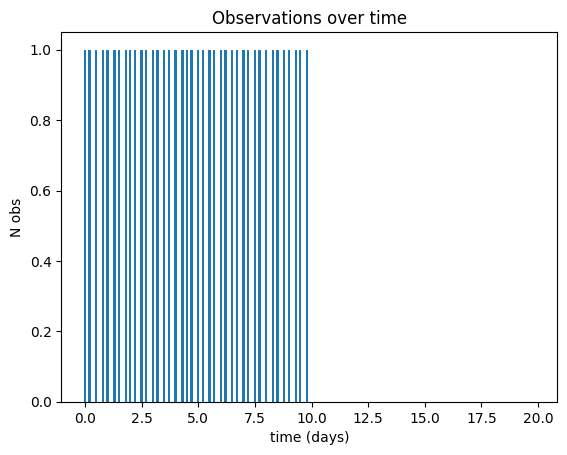

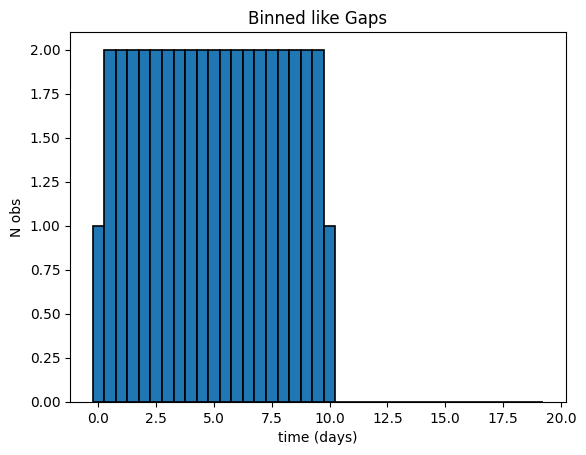

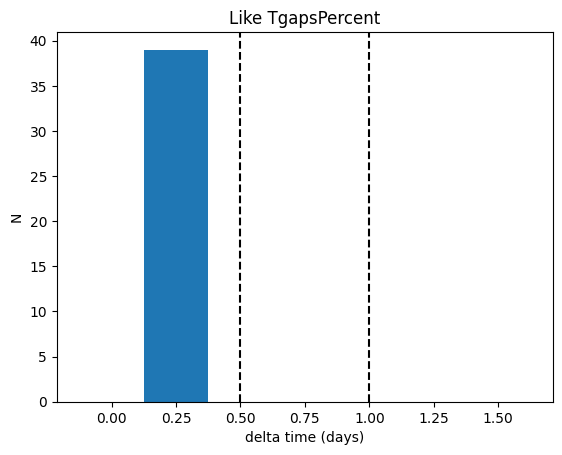

In [18]:
plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.1)-.05)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Observations over time')

plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.5)-.25, edgecolor='black', linewidth=1.2)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Binned like Gaps')

plt.figure()
_tmp = plt.hist(np.diff(data['observationStartMJD']), bins=np.arange(0,2, 0.25)-.125)
plt.xlabel('delta time (days)')
plt.ylabel('N')
plt.title('Like TgapsPercent')

plt.axvline(x=0.5, linestyle='--', color='k')
plt.axvline(x=1.0, linestyle='--', color='k')

This shows one issue with `TgapsPercent`--if we have very high sampling, it (correctly) reports that we are very un-optimized in terms of observing the timescale. This is not how science metrics typically behave. Normally, we want our metrics to only increase (or stay constant) as more observations are added. This is what the `Gaps` metric does. 

In [19]:
# Let's do 10 days at 1-day cadence, 10 days at 0.5-day cadence

# what happens if we double the number of observations
# get the dtype as expected
data = np.zeros(30, dtype=[('observationStartMJD', float)])

# Define a set of times
data['observationStartMJD'] += np.concatenate( (np.arange(0, 10, 1), np.arange(10, 20, 0.5)))

In [20]:
data

array([( 0. ,), ( 1. ,), ( 2. ,), ( 3. ,), ( 4. ,), ( 5. ,), ( 6. ,),
       ( 7. ,), ( 8. ,), ( 9. ,), (10. ,), (10.5,), (11. ,), (11.5,),
       (12. ,), (12.5,), (13. ,), (13.5,), (14. ,), (14.5,), (15. ,),
       (15.5,), (16. ,), (16.5,), (17. ,), (17.5,), (18. ,), (18.5,),
       (19. ,), (19.5,)], dtype=[('observationStartMJD', '<f8')])

In [21]:
tgp.run(data)

100.0

In [22]:
gaps.run(data)

27

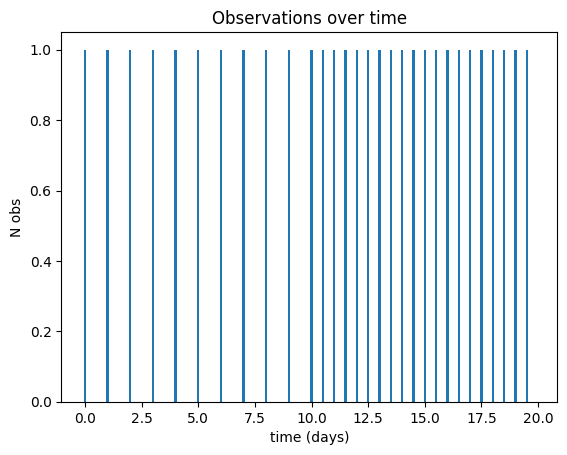

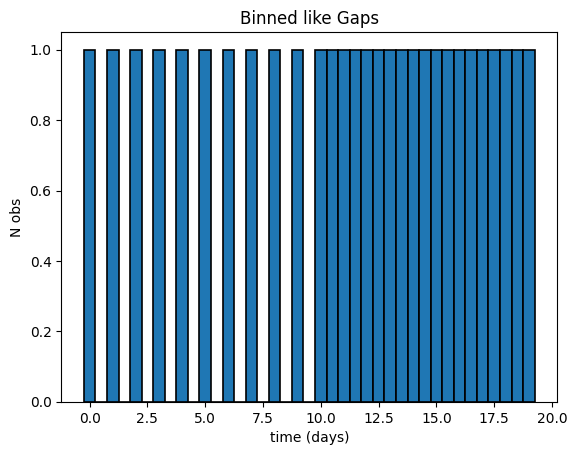

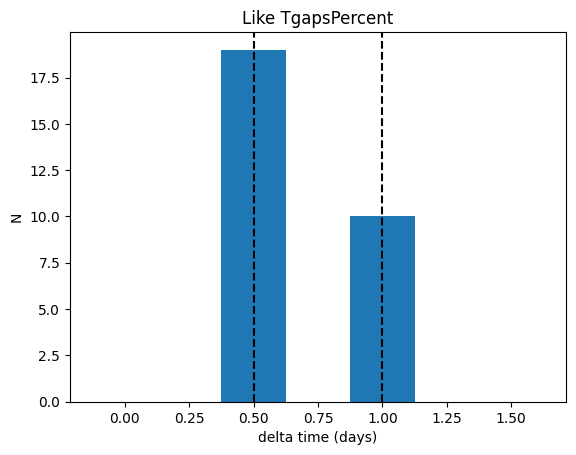

In [23]:
plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.1)-.05)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Observations over time')

plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.5)-.25, edgecolor='black', linewidth=1.2)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Binned like Gaps')

plt.figure()
_tmp = plt.hist(np.diff(data['observationStartMJD']), bins=np.arange(0,2, 0.25)-.125)
plt.xlabel('delta time (days)')
plt.ylabel('N')
plt.title('Like TgapsPercent')

plt.axvline(x=0.5, linestyle='--', color='k')
plt.axvline(x=1.0, linestyle='--', color='k')

We once again have a 100% from `TgapsPercent`, so we might think this sequence is just as good as out initial sequence of 10 days. But `Gaps` correctly notes that now we have more days independently sampled, so it increases.

In [24]:
# Let's do 10 days at 1-day cadence, 10 days at 0.25-day cadence

# what happens if we double the number of observations
# get the dtype as expected
data = np.zeros(50, dtype=[('observationStartMJD', float)])

# Define a set of times
data['observationStartMJD'] += np.concatenate( (np.arange(0, 10, 1), np.arange(10, 20, 0.25)))

In [25]:
data

array([( 0.  ,), ( 1.  ,), ( 2.  ,), ( 3.  ,), ( 4.  ,), ( 5.  ,),
       ( 6.  ,), ( 7.  ,), ( 8.  ,), ( 9.  ,), (10.  ,), (10.25,),
       (10.5 ,), (10.75,), (11.  ,), (11.25,), (11.5 ,), (11.75,),
       (12.  ,), (12.25,), (12.5 ,), (12.75,), (13.  ,), (13.25,),
       (13.5 ,), (13.75,), (14.  ,), (14.25,), (14.5 ,), (14.75,),
       (15.  ,), (15.25,), (15.5 ,), (15.75,), (16.  ,), (16.25,),
       (16.5 ,), (16.75,), (17.  ,), (17.25,), (17.5 ,), (17.75,),
       (18.  ,), (18.25,), (18.5 ,), (18.75,), (19.  ,), (19.25,),
       (19.5 ,), (19.75,)], dtype=[('observationStartMJD', '<f8')])

In [26]:
tgp.run(data)

20.408163265306122

In [27]:
gaps.run(data)

28

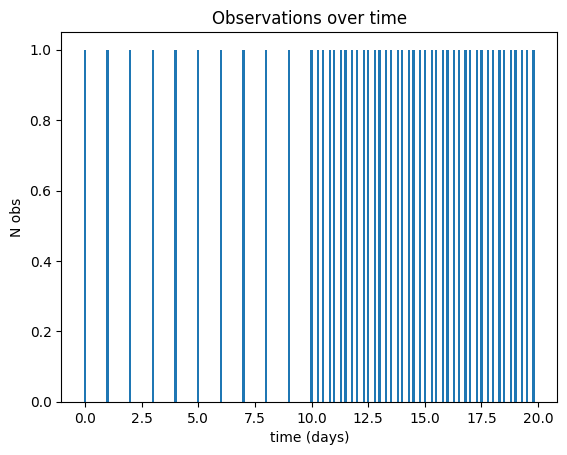

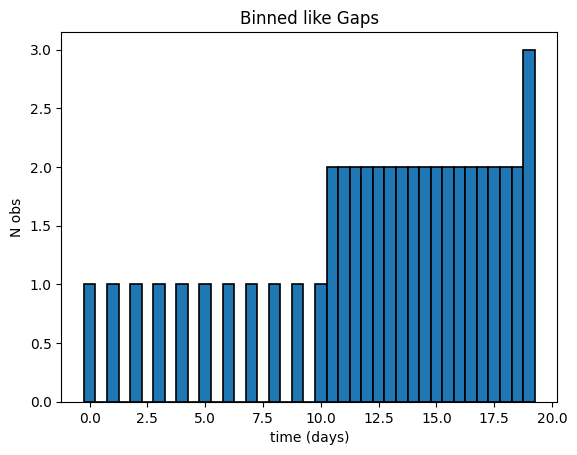

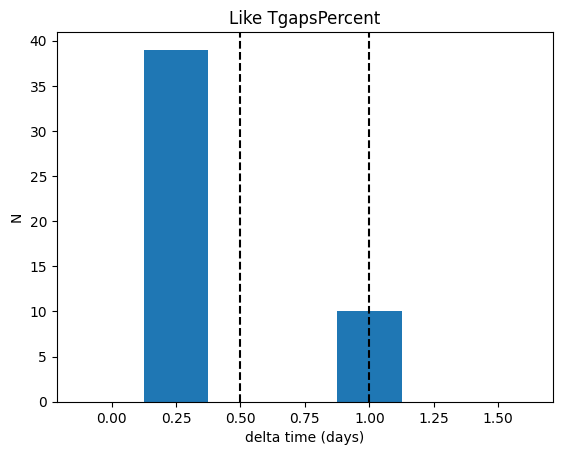

In [28]:
plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.1)-.05)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Observations over time')

plt.figure()
_tmp = plt.hist(data['observationStartMJD'], bins=np.arange(0,20, 0.5)-.25, edgecolor='black', linewidth=1.2)
plt.xlabel('time (days)')
plt.ylabel('N obs')
plt.title('Binned like Gaps')

plt.figure()
_tmp = plt.hist(np.diff(data['observationStartMJD']), bins=np.arange(0,2, 0.25)-.125)
plt.xlabel('delta time (days)')
plt.ylabel('N')
plt.title('Like TgapsPercent')

plt.axvline(x=0.5, linestyle='--', color='k')
plt.axvline(x=1.0, linestyle='--', color='k')

Once again, adding data has caused `TgapsPercent` to drop, while `Gaps` stays nearly constant.